<a href="https://colab.research.google.com/github/CodeExplorer777/Climate-Predictor-AI-/blob/main/Ultimate_Carbon_FootPrint_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌍 Enter the following values:
🌡️ Temperature (°C): 30
💨 CO2 Level (ppm): 50
🌧️ Rainfall (mm): 700
🌲 Deforestation Level (1-5): 3
🧠 Predicted Climate Risk Level: Low


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


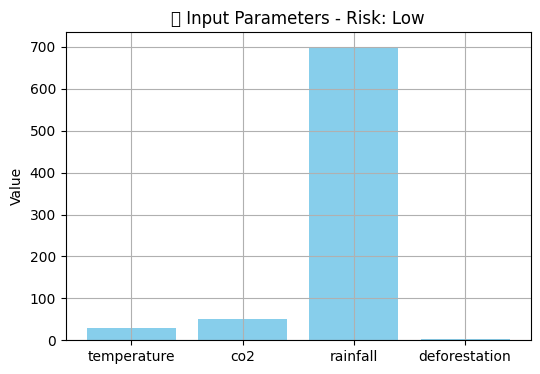


🔮 **Future Climate Risk Prediction**
Based on current trends, the projected climate risk level in the near future could be: Low


In [9]:
# 📘 Climate Risk Predictor - AI Agent (UN SDG 13)
# Author: [Your Name]
# Goal: Predict climate impact risk based on user inputs

# Step 1: Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Step 2: Create or Load Dataset (Synthetic Sample)
data = {
    'temperature': np.random.normal(30, 5, 100),
    'co2': np.random.normal(400, 50, 100),
    'rainfall': np.random.normal(100, 30, 100),
    'deforestation': np.random.randint(1, 5, 100),
}

df = pd.DataFrame(data)

# Assign labels: 0 = Low, 1 = Medium, 2 = High Climate Risk
def classify(row):
    score = 0
    if row['temperature'] > 35: score += 1
    if row['co2'] > 450: score += 1
    if row['rainfall'] < 80: score += 1
    if row['deforestation'] > 2: score += 1
    if score <= 1: return 0
    elif score == 2: return 1
    else: return 2

df['risk'] = df.apply(classify, axis=1)

# Step 3: Train the Model
X = df[['temperature', 'co2', 'rainfall', 'deforestation']]
y = df['risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'climate_risk_model.pkl')

# Step 4: Allow Manual User Input
print("🌍 Enter the following values:")
user_input = {
    "temperature": float(input("🌡️ Temperature (°C): ")),
    "co2": float(input("💨 CO2 Level (ppm): ")),
    "rainfall": float(input("🌧️ Rainfall (mm): ")),
    "deforestation": float(input("🌲 Deforestation Level (1-5): "))
}

user_df = pd.DataFrame([user_input])

# Step 5: Predict Climate Risk
label_map = {0: "Low", 1: "Medium", 2: "High"}
prediction = model.predict(user_df)[0]
print("🧠 Predicted Climate Risk Level:", label_map[prediction])

# Step 6: Visualize Results
plt.figure(figsize=(6,4))
plt.bar(user_df.columns, user_df.values[0], color='skyblue')
plt.title(f"🌍 Input Parameters - Risk: {label_map[prediction]}")
plt.ylabel("Value")
plt.grid(True)
plt.show()



future_temp = user_input['temperature'] + 1.5  # Simulate global warming
future_co2 = user_input['co2'] + 30            # Increase in CO2
future_rainfall = user_input['rainfall'] - 10  # Slight drop in rainfall
future_deforestation = min(user_input['deforestation'] + 1, 5)  # Cap at 5

future_input = pd.DataFrame([{
    "temperature": future_temp,
    "co2": future_co2,
    "rainfall": future_rainfall,
    "deforestation": future_deforestation
}])

future_pred = model.predict(future_input)[0]
future_label = label_map[future_pred]

print("\n🔮 **Future Climate Risk Prediction**")
print(f"Based on current trends, the projected climate risk level in the near future could be: {future_label}")
